In [34]:
from os import getcwd, path
import torch as t
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.patches import Polygon, FancyArrowPatch, ArrowStyle

In [3]:
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams["text.usetex"] = True
mpl.rcParams["font.family"] = "Helvetica"
mpl.rcParams["font.size"] = 12
mpl.rcParams["text.latex.preamble"] = "\\usepackage{amssymb}"

In [4]:
def remove_ticklines(ax):
    for tic in ax.xaxis.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)
        tic.label1.set_visible(False)
        tic.label2.set_visible(False)
    for tic in ax.yaxis.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)
        tic.label1.set_visible(False)
        tic.label2.set_visible(False)

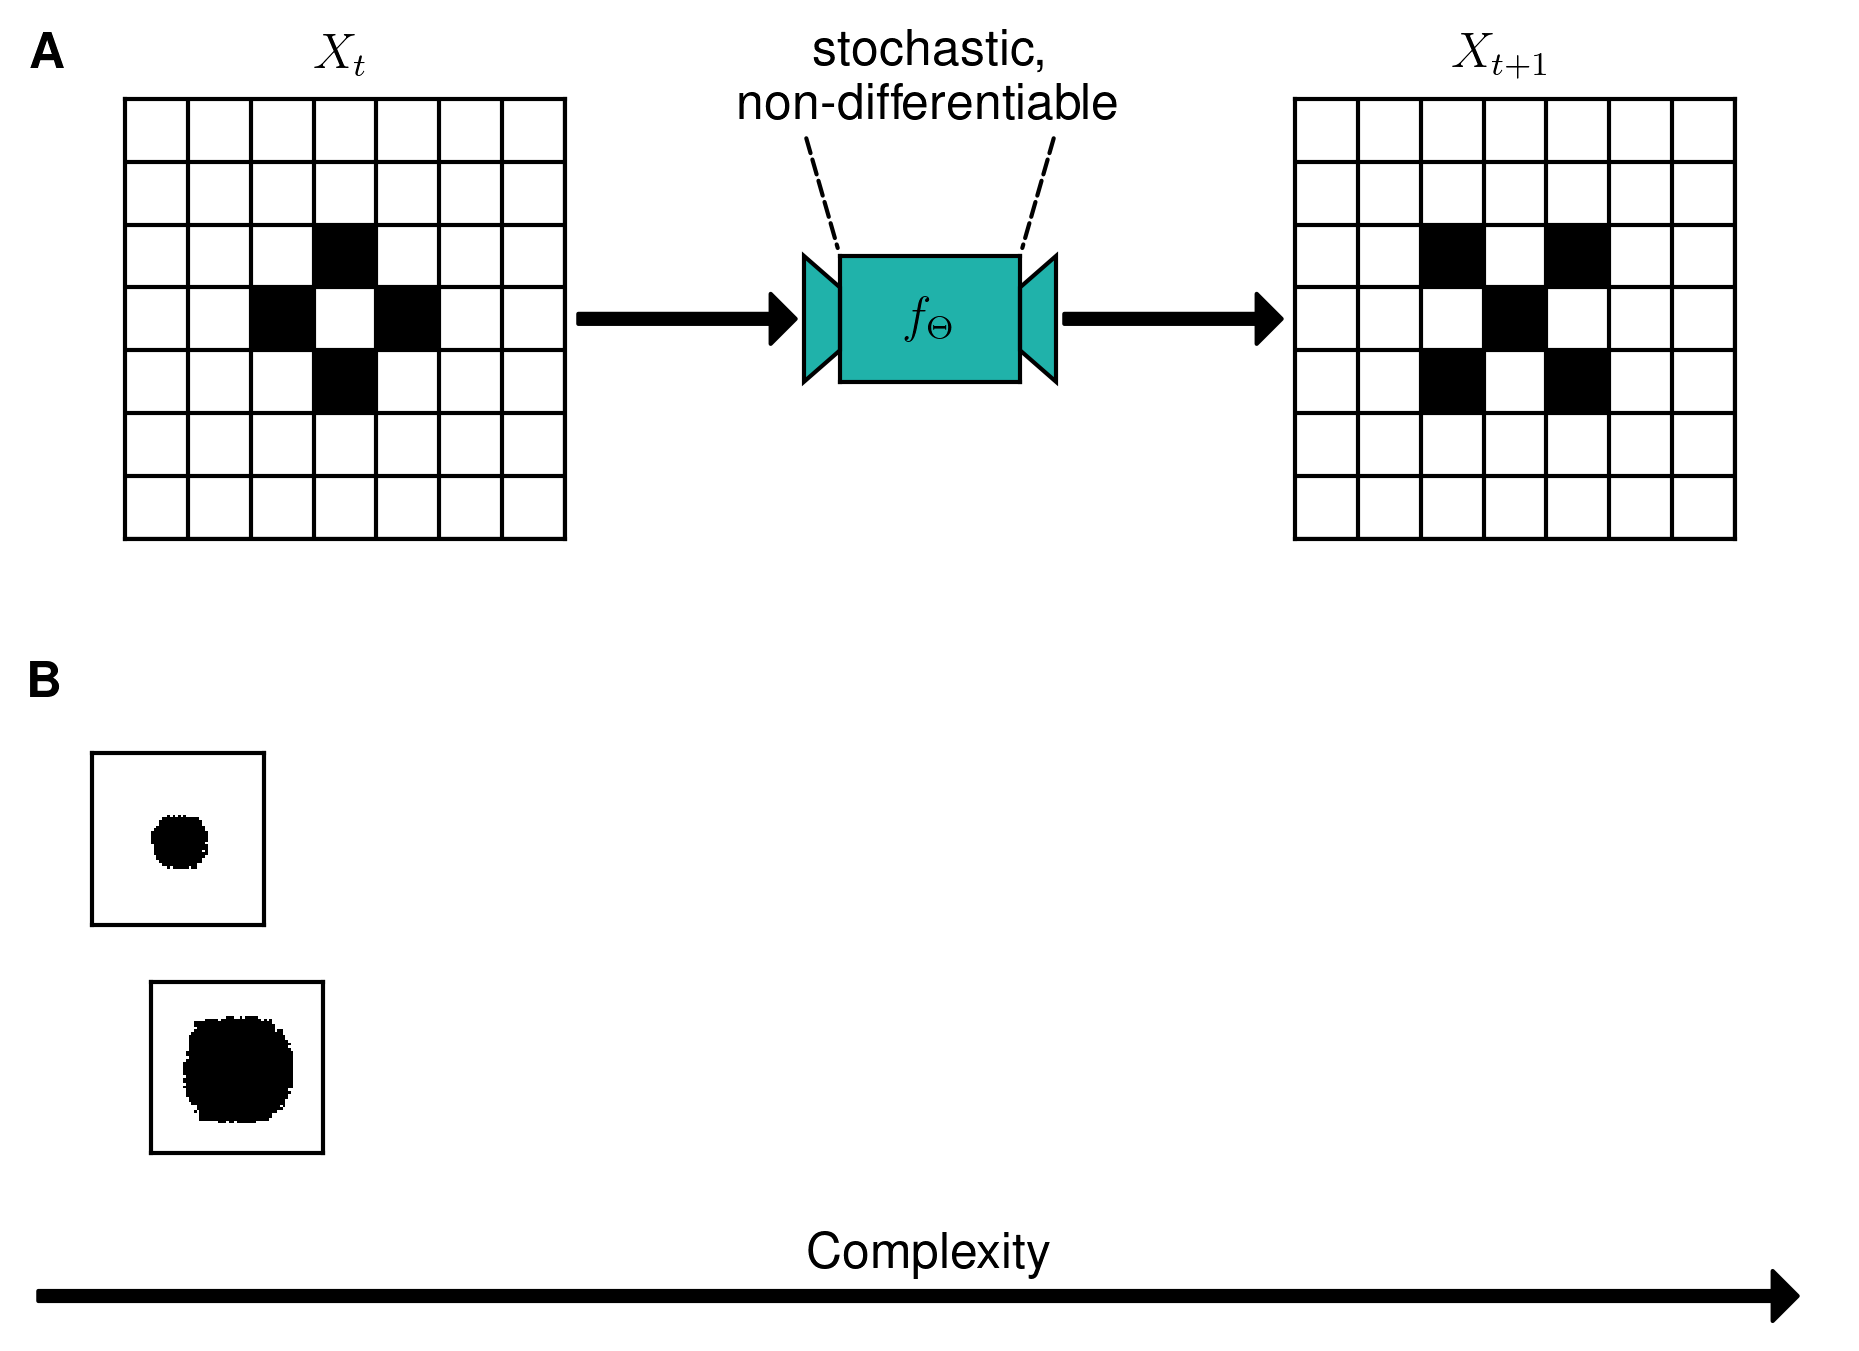

In [44]:
fig = plt.figure(layout='constrained', figsize=(6,4), dpi=300)
subfigs = fig.subfigures(2, 1, wspace=0.07, hspace=0., height_ratios=[1.1,1])

grid_t1 = subfigs[0].add_axes([-0.175, 0.25, 0.7, 0.7])
grid_t1_lattice = t.zeros((7,7))
grid_t1_lattice[2,3] = 1 
grid_t1_lattice[4,3] = 1 
grid_t1_lattice[3,2] = 1 
grid_t1_lattice[3,4] = 1 
grid_t1.imshow(grid_t1_lattice, cmap="Greys", interpolation="nearest", vmin=0, vmax=1)
grid_t1.grid(color='black', linewidth=1)
grid_t1.set_xticks(np.arange(.5, 7.5, 1))
grid_t1.set_yticks(np.arange(.5, 7.5, 1))
remove_ticklines(grid_t1)
grid_t1.text(2.5,-1.0,"$X_t$")

grid_t2 = subfigs[0].add_axes([0.475, 0.25, 0.7, 0.7])
grid_t2_lattice = t.zeros((7,7))
grid_t2_lattice[3,3] = 1 
grid_t2_lattice[2,2] = 1 
grid_t2_lattice[4,2] = 1 
grid_t2_lattice[4,4] = 1 
grid_t2_lattice[2,4] = 1 
grid_t2.imshow(grid_t2_lattice, cmap="Greys", interpolation="nearest", vmin=0, vmax=1)
grid_t2.grid(color='black', linewidth=1)
grid_t2.set_xticks(np.arange(.5, 7.5, 1))
grid_t2.set_yticks(np.arange(.5, 7.5, 1))
remove_ticklines(grid_t2)
grid_t2.text(2.,-1.0,"$X_{t+1}$")

f_box = subfigs[0].add_axes([0.45, 0.5, 0.1, 0.2], facecolor="lightseagreen")
remove_ticklines(f_box)

pts_left = np.array([
    [0., 0.75],
    [-0.2, 1.],
    [-0.2, 0.],
    [0., 0.25],
    [0., 0.75]
])
p_left = Polygon(pts_left, color="lightseagreen", clip_on=False)
p_left.set_edgecolor("black")
f_box.add_patch(p_left)

pts_right = np.array([
    [1., 0.75],
    [1.2, 1.],
    [1.2, 0.],
    [1., 0.25],
    [1., 0.75]
])
p_right = Polygon(pts_right, color="lightseagreen", clip_on=False)
p_right.set_edgecolor("black")
f_box.add_patch(p_right)
f_box.text(0.5,0.5,"$f_\\Theta$", ha="center", va="center", transform=f_box.transAxes)

f_box.annotate('',
    xy = (-0.2,0.5),
    xytext = (-1.5,0.5),
    arrowprops = {
        'arrowstyle': ArrowStyle(stylename="Simple", head_width=1.),
        'color': "black",
    },
    horizontalalignment = 'center',
    annotation_clip=False
)

f_box.annotate('',
    xy = (2.5,0.5),
    xytext = (1.2,0.5),
    arrowprops = {
        'arrowstyle': ArrowStyle(stylename="Simple", head_width=1.),
        'color': "black",
    },
    horizontalalignment = 'center',
    annotation_clip=False
)

f_box.annotate('',
    xy = (0,1),
    xytext = (-0.2,2),
    arrowprops = {
        'arrowstyle': '-',
        'color': "black",
        'linestyle': '--'
    },
    horizontalalignment = 'center',
    annotation_clip=False
)

f_box.annotate('',
    xy = (1,1),
    xytext = (1.2,2),
    arrowprops = {
        'arrowstyle': '-',
        'color': "black",
        'linestyle': '--'
    },
    horizontalalignment = 'center',
    annotation_clip=False
)
f_box.text(0.5, 2.1, "stochastic,\nnon-differentiable", ha="center", transform=f_box.transAxes)

rhs = subfigs[1].subfigures(1,3)
rhs[0].text(0,1,"\\textbf{B}")
#rhs[1].text(0,1,"\\textbf{C}")
#rhs[2].text(0,1,"\\textbf{D}")


bounding_1 = rhs[0].add_axes([0,0,1,1])
bounding_1.axis("off")
bounding_1.annotate('',
    xy = (3,-0.05),
    xytext = (0.,-0.05),
    arrowprops = {
        'arrowstyle': ArrowStyle(stylename="Simple", head_width=1.),
        'color': "black",
    },
    horizontalalignment = 'center',
    annotation_clip=False,
    zorder=10
)
rhs[1].text(0.5,0,"Complexity",ha="center")

example_1 = rhs[0]
si_sequence = np.load(path.join(getcwd(), "data", "si_sample", "sequence.npy"))
start_ex1 = example_1.add_axes([0.1,0.6,0.3,0.3])
remove_ticklines(start_ex1)
start_ex1.imshow(si_sequence[10], cmap="Greys", interpolation="nearest", vmin=0, vmax=1)

progress_ex1 = example_1.add_axes([0.2,0.2,0.3,0.3])
remove_ticklines(progress_ex1)
progress_ex1.imshow(si_sequence[20], cmap="Greys", interpolation="nearest", vmin=0, vmax=1)


subfigs[0].text(0,1,"\\textbf{A}")

plt.show()